### Running Haplarithmisis
This notebook is to implement the Haplarithmisis scripts.

#### 1. MetaInfo 
We have provided a sample config file in the repo, more details see: [config.txt](https://github.com/CellularGenomicMedicine/WGSPGT/blob/main/Haplarithmisis/PGT_config_PGD9999.txt), [samplesheet.csv](https://github.com/CellularGenomicMedicine/WGSPGT/blob/main/Haplarithmisis/ExampleSamplesheet.csv).

In [1]:
# load library
import re
import glob
from subprocess import run
from IPython.display import Image, display

# define the command and arguments
load_module= "module load bioinf/singularity/3.0"
run_simg = "singularity exec pgtR-1.0.simg Rscript"
script_path = "/home/ping.cao/CGM/Haplarithmisis/analyses"
config_file = "/home/ping.cao/CGM/testfamily/Family7/D24_00000-PLN_PGD/PGT_config_Family7.txt"
err_file = "error.err"

In [2]:
goal = "MetaInfo"
r_script = f"{script_path}/{goal}/{goal}.R"
cmd1 = f"{load_module} && {run_simg} {r_script} {config_file} {goal}_{err_file}"

result = run(cmd1, capture_output=True, text=True, shell=True)

# print out result
print(result.stdout)

[1] "Potential errors written to: MetaInfo_error.err"
AF/UM/AGF/UGM has been tested 



#### 2. ConvertGenotype



In [3]:
goal = "ConvertGenotype"
r_script = f"{script_path}/{goal}/{goal}.R"
cmd2 = f"{load_module} && {run_simg} {r_script} {config_file} {goal}_{err_file}"

result = run(cmd2, capture_output=True, text=True, shell=True)

# print out result
print(result.stdout)

[1] "Potential errors written to: ConvertGenotype_error.err"
[1] "Started reading vcfR for Crd and Alleles"
[1] "Determine SNP coverage"
[1] "Started reading Vcf for GT"
[1] "Started calculating BAF"
[1] "Writing data to /home/ping.cao/CGM/testfamily/Family7/D24_00000-PLN_PGD/ConvertGenotype/Father_7_embryo-18_Family7_GT.txt..."

Read 18.0% of 5676104 rows
Read 32.2% of 5676104 rows
Read 46.9% of 5676104 rows
Read 61.8% of 5676104 rows
Read 76.5% of 5676104 rows
Read 91.4% of 5676104 rows
Read 97.2% of 5676104 rows
Read 5676104 rows and 9 (of 9) columns from 0.316 GB file in 00:00:12
[1] "Writing data to /home/ping.cao/CGM/testfamily/Family7/D24_00000-PLN_PGD/ConvertGenotype/Father_7_embryo-19_Family7_GT.txt..."

Read 21.5% of 5676104 rows
Read 36.5% of 5676104 rows
Read 51.1% of 5676104 rows
Read 65.5% of 5676104 rows
Read 79.6% of 5676104 rows
Read 93.7% of 5676104 rows
Read 97.2% of 5676104 rows
Read 5676104 rows and 9 (of 9) columns from 0.316 GB file in 00:00:11
[1] "Writing data 

#### 3. QDNASeq



In [4]:
goal = "QDNASeq"
r_script = f"{script_path}/{goal}/{goal}.R"
cmd3 = f"{load_module} && {run_simg} {r_script} {config_file} {goal}_{err_file}"

result = run(cmd3, capture_output=True, text=True, shell=True)

# print out result
print(result.stdout)

[1] "Potential errors written to: QDNASeq_error.err"
[1] "Started calculating LogR"
[1] "Writing data to /home/ping.cao/CGM/testfamily/Family7/D24_00000-PLN_PGD/QDNASeq/Father_7_embryo-18_Family7_LogR.txt..."
[1] "Writing data to /home/ping.cao/CGM/testfamily/Family7/D24_00000-PLN_PGD/QDNASeq/Father_7_embryo-19_Family7_LogR.txt..."
[1] "Writing data to /home/ping.cao/CGM/testfamily/Family7/D24_00000-PLN_PGD/QDNASeq/Father_7_embryo-20_Family7_LogR.txt..."
[1] "Started calculating SegLogR for gamma 50"
[1] "PCF segmentation is applying..."
[1] "Father ==> gamma 50 is applied"
[1] "Mother ==> gamma 50 is applied"
[1] "Grandfatherfather ==> gamma 50 is applied"
[1] "Grandmotherfather ==> gamma 50 is applied"
[1] "7_embryo-18 ==> gamma 50 is applied"
[1] "7_embryo-19 ==> gamma 50 is applied"
[1] "7_embryo-20 ==> gamma 50 is applied"
[1] "Writing data to /home/ping.cao/CGM/testfamily/Family7/D24_00000-PLN_PGD/QDNASeq/Father_7_embryo-18_Family7_SegLogR.txt..."
[1] "Writing data to /home/ping.

#### 4. NucBedPrep & 5. PGT Wave correction (optional)
Run this step when embryo sequencing information is present. NucBedPrep generates a file containing Chr, Position and Names (format: "chrX:Position") from the family vcf file that will be used for subsequent step PGT Wave Correction.

4.
`goal = "NucBedPrep"`
```
r_script = f"{script_path}/{goal}/{goal}.R"
cmd4 = f"{load_module} && {run_simg} {r_script} {config_file} {goal}_{err_file}"
result = run(cmd4, capture_output=True, text=True, shell=True)
```

5.
`goal="WaveCorrection"`
```
toload="module load bioinf/bedtools/2.17.0"
sampledir="/home/ping.cao/CGM/testfamily/Family7/D24_00000-GENE_PGD/ConvertGenotype"
refdir="/ifs/data/lib/genomes/human/bwa-mem2"
windowsize=10000
bashrun=f"nucBed -bed {sampledir}/Window10000.bed -fi {refdir}/GRCh38_pgt/GCA_000001405.15_GRCh38_full_plus_hs38d1_analysis_set.pgt.fna > {sampledir}/{windowsize}_GCcontent.txt"
cmd5 = f"{toload} && {bashrun}"
result = run(['/bin/bash', '-c', cmd5], capture_output=True, text=True)
```

#### 6. Haplarithmisis
**input**: <br>
`config_file_fam`: config file from family<br>
`EmbryoID`: embryoID<br>
`Gamma_value`: gamma value<br>
`errorFilePath`: error path<br>

In [5]:
goal = "Haplarithmisis"
r_script = f"{script_path}/{goal}/{goal}.R"
arg0 = "7_embryo-18"
arg1 = "50"

cmd6 = f"{load_module} && {run_simg} {r_script} {config_file} {arg0} {arg1} {goal}_{err_file}"

result = run(cmd6, capture_output=True, text=True, shell=True)

# print out result
print(result.stdout)

[1] "Potential errors written to: Haplarithmisis_error.err"
[1] "Loading parameters and intervals..."

Read 4.4% of 5676104 rows
Read 9.9% of 5676104 rows
Read 19.0% of 5676104 rows
Read 22.4% of 5676104 rows
Read 31.0% of 5676104 rows
Read 35.4% of 5676104 rows
Read 41.2% of 5676104 rows
Read 53.7% of 5676104 rows
Read 66.9% of 5676104 rows
Read 68.7% of 5676104 rows
Read 70.3% of 5676104 rows
Read 85.6% of 5676104 rows
Read 86.5% of 5676104 rows
Read 97.2% of 5676104 rows
Read 5676104 rows and 9 (of 9) columns from 0.316 GB file in 00:00:28

Read 0.0% of 5676104 rows
Read 18.3% of 5676104 rows
Read 37.3% of 5676104 rows
Read 54.6% of 5676104 rows
Read 71.7% of 5676104 rows
Read 92.3% of 5676104 rows
Read 97.2% of 5676104 rows
Read 5676104 rows and 8 (of 8) columns from 0.298 GB file in 00:00:13
[1] "Chr-specific QC analysis for family"
[1] "#1 ==> Call-rate computation..."
[1] "Father"
[1] "Mother"
[1] "Grandfatherfather"
[1] "Grandmotherfather"
[1] "7_embryo-18"
[1] "#2 ==> Mendelia

#### 7. EmbryoTestReportData
**input**: <br>
`config_file_fam`: config file from family<br>
`dbsnp_path`: dbsnp path<br>
`EmbryoID`: embryoID<br>
`Gamma_value`: gamma value<br>
`errorFilePath`: error path<br>

In [6]:
goal = "EmbryoTestReportData"
r_script = f"{script_path}/{goal}/{goal}.R"
arg0= "/ifs/data/research/CGM/Genomes/Human/snp150_pgt/AllWithoutAlleles_20170710_adj."
arg1 = "7_embryo-18"
arg2 = "50"

cmd7 = f"{load_module} && {run_simg} {r_script} {config_file} {arg0} {arg1} {arg2} {goal}_{err_file}"

result = run(cmd7, capture_output=True, text=True, shell=True)

# print out result
print(result.stdout)

#### 8. EmbryoTestReportPlot
**input**: <br>
`config_file_fam`: config file from family<br>
`EmbryoID`: embryoID<br>
`Gamma_value`: gamma value<br>
`errorFilePath`: error path<br>


Read 9.0% of 5238474 rows
Read 38.8% of 5238474 rows
Read 74.6% of 5238474 rows
Read 76.7% of 5238474 rows
Read 98.1% of 5238474 rows
Read 5238474 rows and 5 (of 5) columns from 0.148 GB file in 00:00:13

Read 22.1% of 5238474 rows
Read 71.4% of 5238474 rows
Read 98.1% of 5238474 rows
Read 5238474 rows and 5 (of 5) columns from 0.148 GB file in 00:00:08

Read 9.2% of 5238474 rows
Read 55.4% of 5238474 rows
Read 98.1% of 5238474 rows
Read 5238474 rows and 4 (of 4) columns from 0.138 GB file in 00:00:08

Read 0.0% of 5238474 rows
Read 19.9% of 5238474 rows
Read 40.5% of 5238474 rows
Read 59.0% of 5238474 rows
Read 77.3% of 5238474 rows
Read 98.1% of 5238474 rows
Read 5238474 rows and 8 (of 8) columns from 0.277 GB file in 00:00:12

Read 0.0% of 5238474 rows
Read 19.1% of 5238474 rows
Read 30.2% of 5238474 rows
Read 46.6% of 5238474 rows
Read 51.4% of 5238474 rows
Read 72.0% of 5238474 rows
Read 90.7% of 5238474 rows
Read 98.1% of 5238474 rows
Read 5238474 rows and 9 (of 9) columns from 

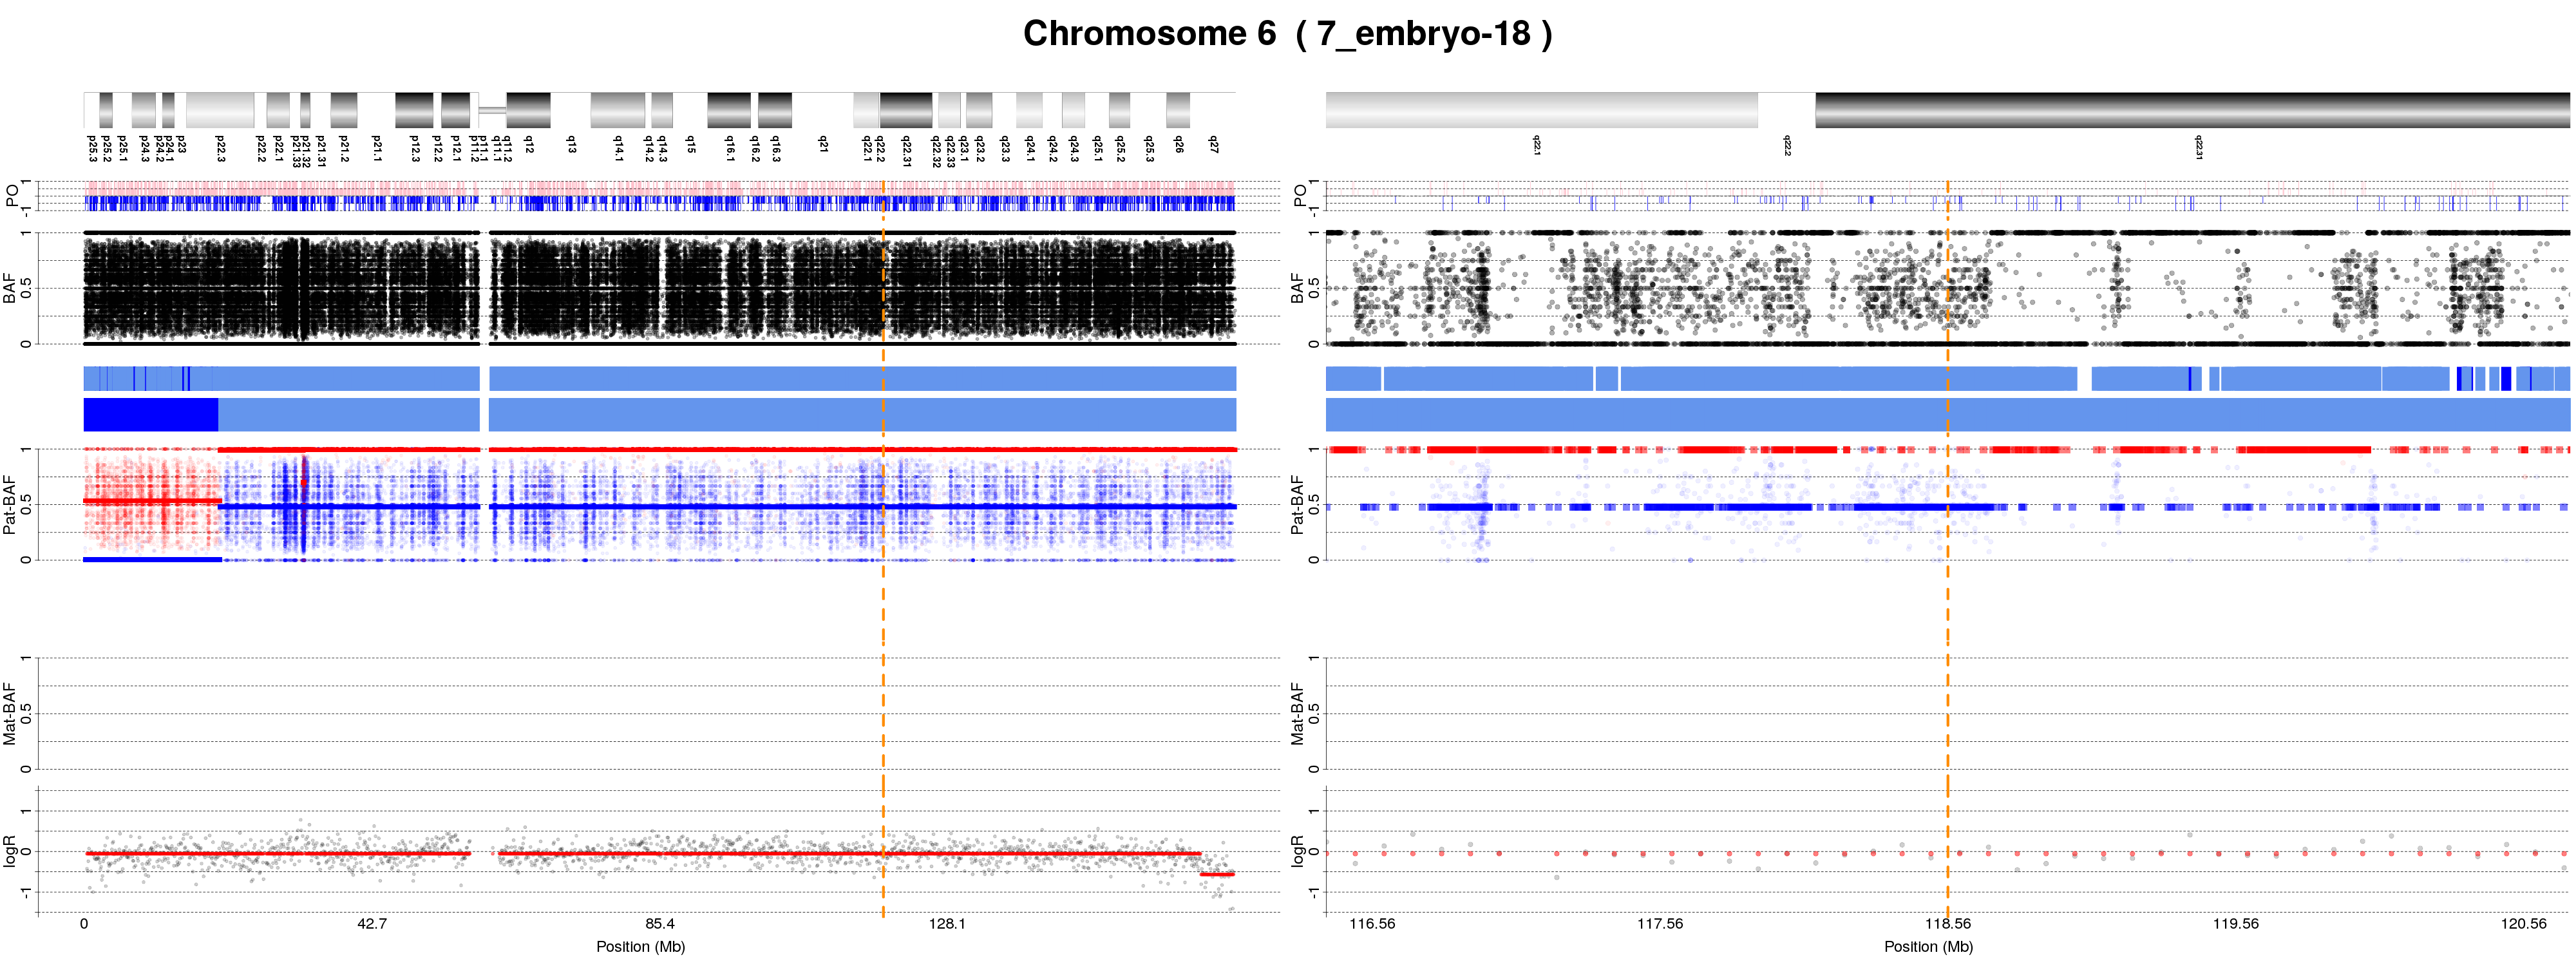

In [7]:
goal = "EmbryoTestReportPlot"
r_script = f"{script_path}/{goal}/{goal}.R"
arg0 = "7_embryo-18"
arg1 = "50"

cmd8 = f"{load_module} && {run_simg} {r_script} {config_file} {arg0} {arg1} {err_file}"
result = run(cmd8, capture_output=True, text=True, shell=True)
print(result.stdout)

# show the saved image
match = re.search(r'at\s+(.+?)/"?$', result.stdout)
path = match.group(1)
for img in glob.glob(f"{path}/*.png"):
    display(Image(img))

<br>
We also provide a single python script (pipeline.py) to wrap them together! 🌮 🎉 

```
python haplarithmisis_pipeline.py \
--run_simg "singularity exec /home/ping.cao/CGM/pgtR-1.0.simg Rscript" \
--goal MetaInfo \
--script_path "/home/ping.cao/CGM/Haplarithmisis/analyses" \
--config_file "/home/ping.cao/CGM/testfamily/Family7/D24_00000-PLN_PGD/PGT_config_Family7.txt"
```